# Mandatory Assignment #01

Applied Machine Learning and Data Engineering in Business Context KAN-CDSCV1008U

Andrea Perez Lopez
Susana Morala Miguel
Maria Magdalena Gomez
Laura Peciulyte

Data set was scraped from airlinequality.com and contains text-based reviews in addition to reviewers' ratings of available dimensions on the website.
Source data: https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews?datasetId=3415709

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('AirlineReviews.csv')
data.shape

(129455, 22)

In [3]:
#Check the data
data.head(3), data.tail(3),

(        Aircraft  AirlineName      CabinType      DateFlown  \
 0            NaN  AB Aviation  Economy Class  November 2019   
 1           E120  AB Aviation  Economy Class      June 2019   
 2  Embraer E120   AB Aviation  Economy Class      June 2019   
 
               DatePub  EntertainmentRating  FoodRating  GroundServiceRating  \
 0  11th November 2019                    0           4                    4   
 1      25th June 2019                    0           1                    1   
 2      25th June 2019                    0           1                    1   
 
    OriginCountry  OverallScore  ...                Route SeatComfortRating  \
 0    Netherlands           9.0  ...     Moroni to Moheli                 4   
 1  UnitedKingdom           1.0  ...    Moroni to Anjouan                 2   
 2  UnitedKingdom           1.0  ...  Anjouan to Dzaoudzi                 2   
 
   ServiceRating         Slug                         Title    TravelType  \
 0             5  ab-avia

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36423 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [5]:
# Statistical summary of the numerical data
data.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# Check the number missing values in the whole data
data.isna().sum().sort_values(ascending=False)

Aircraft               93032
TripVerified           69947
Route                  38630
DateFlown              38462
TravelType             38309
OverallScore            4331
CabinType               3018
OriginCountry           1678
Review                   824
Title                      4
GroundServiceRating        0
Recommended                0
AirlineName                0
FoodRating                 0
SeatComfortRating          0
ServiceRating              0
Slug                       0
EntertainmentRating        0
DatePub                    0
ValueRating                0
WifiRating                 0
unique_id                  0
dtype: int64

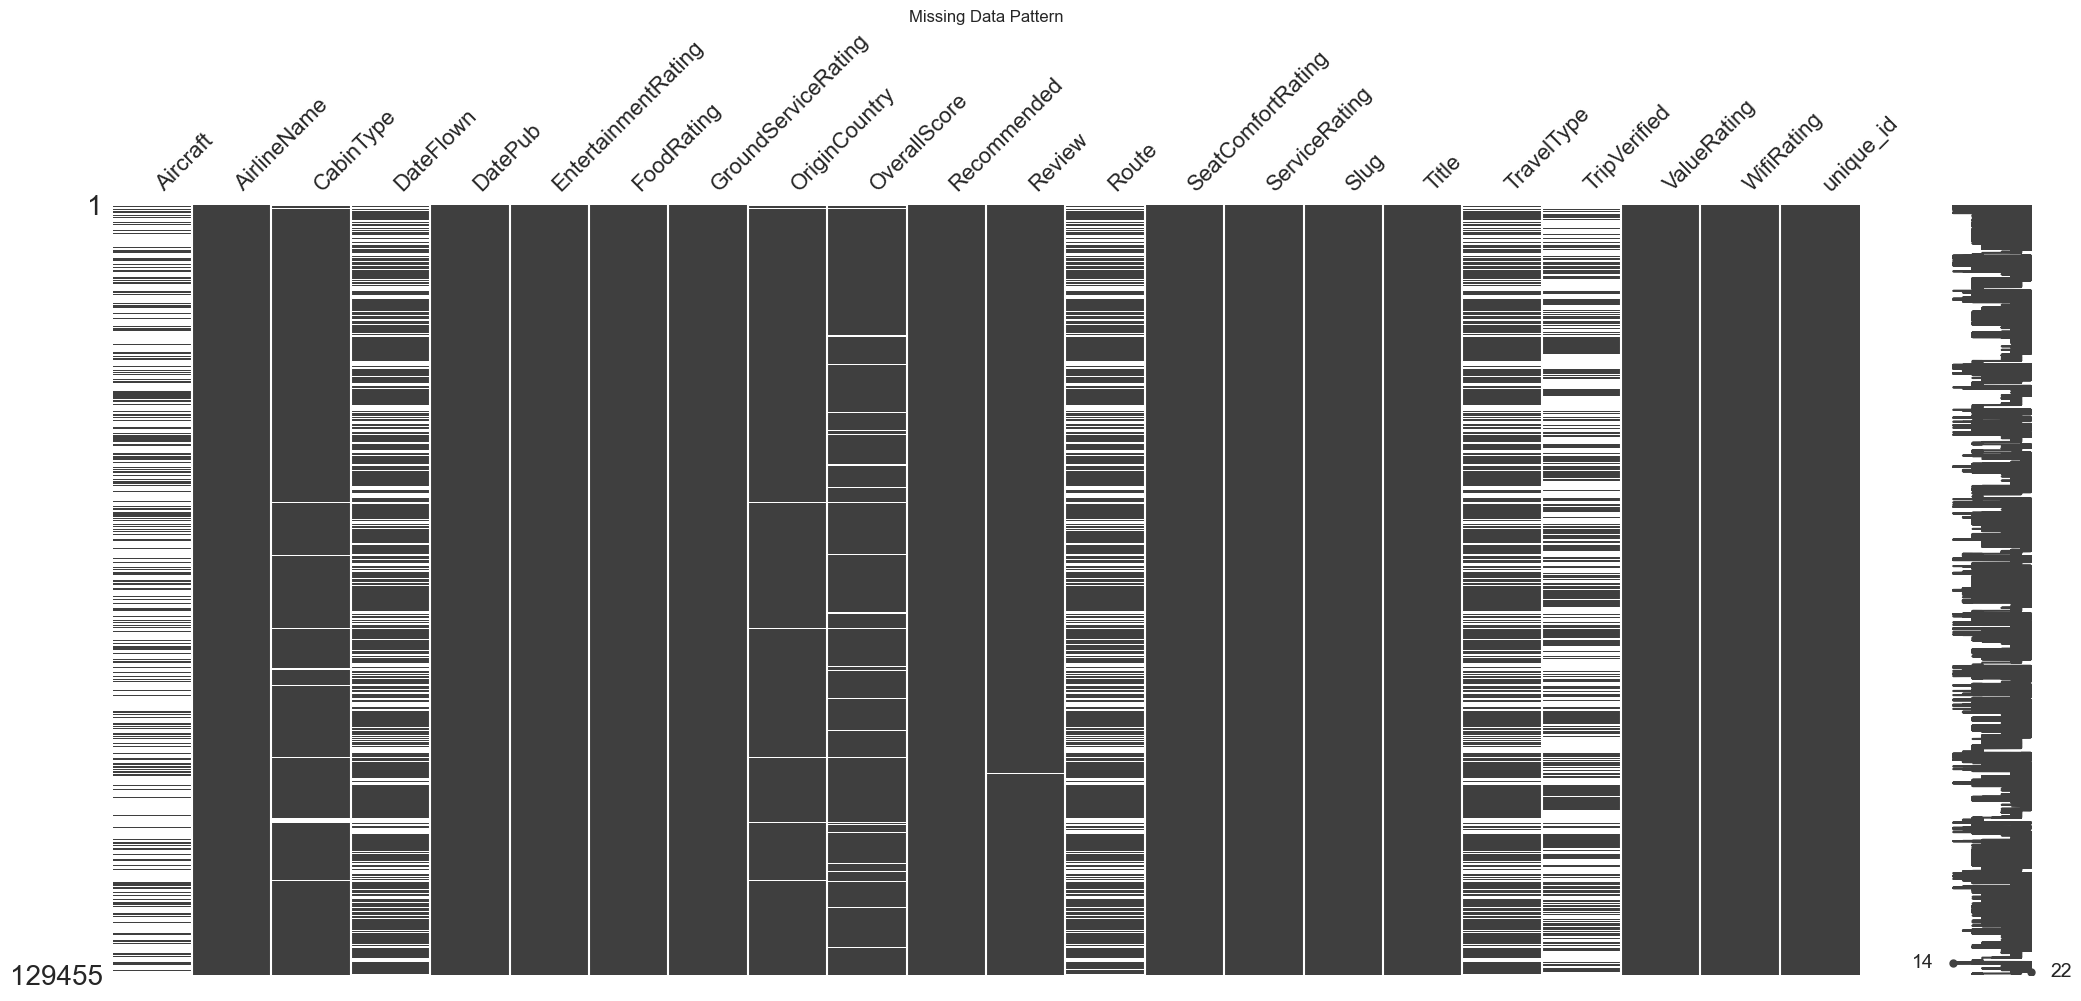

In [7]:
# Create a pattern graph from the missing values
msno.matrix(data)
plt.title('Missing Data Pattern')
plt.show()

In [8]:
#Check for duplicated values
data.duplicated().sum()

0

In [9]:
#Check the columns with the most missing values
data[['TripVerified', 'Aircraft']].isna().sum()

TripVerified    69947
Aircraft        93032
dtype: int64

In [10]:
# Check the number of unique values in each column
data.nunique()

Aircraft                 3632
AirlineName               547
CabinType                   4
DateFlown                 111
DatePub                  5200
EntertainmentRating         6
FoodRating                  6
GroundServiceRating         6
OriginCountry             202
OverallScore               10
Recommended                 2
Review                 128425
Route                   51401
SeatComfortRating           6
ServiceRating               6
Slug                      548
Title                   70975
TravelType                  4
TripVerified                6
ValueRating                 6
WifiRating                  6
unique_id              129455
dtype: int64

The "TripVerified" column contains 6 unique values, which appears to be incorrect. In reality, it should only have two distinct values: 'verified' (Trip Verified) or 'not verified.

In [11]:
data['TripVerified'].unique()

array(['Trip Verified', nan, 'Not Verified',
       'Trip Verified,Trip Verified', 'NotVerified',
       'Not Verified,Not Verified',
       'Chicago to Colorado Springs. Not Verified'], dtype=object)

In [12]:
# Replace the incorrect values
replacement_mapping = {
    'Trip Verified,Trip Verified': 'Trip Verified',
    'NotVerified': 'Not Verified',
    'Not Verified,Not Verified': 'Not Verified',
    'Chicago to Colorado Springs. Not Verified': 'Not Verified'
}
# Replace values in the 'TripVerified' column
data['TripVerified'] = data['TripVerified'].replace(replacement_mapping)

In [13]:
data['TripVerified'].value_counts()

TripVerified
Trip Verified    45441
Not Verified     14067
Name: count, dtype: int64

The assumption is to analyze only the verified trips because they are more likely to provide accurate and credible information about the airline experience. Verified trips typically involve reviewers whose identities or booking details have been confirmed by the platform or airline, reducing the likelihood of fake or unreliable reviews.

In [14]:
data_clean=data[data['TripVerified']=='Trip Verified']
data_clean.shape

(45441, 22)

In [15]:
data_clean.nunique()

Aircraft                1953
AirlineName              459
CabinType                  4
DateFlown                 83
DatePub                 1998
EntertainmentRating        6
FoodRating                 6
GroundServiceRating        6
OriginCountry            181
OverallScore              10
Recommended                2
Review                 45311
Route                  27259
SeatComfortRating          6
ServiceRating              6
Slug                     460
Title                  38170
TravelType                 4
TripVerified               1
ValueRating                6
WifiRating                 6
unique_id              45441
dtype: int64

In [16]:
data_clean['CabinType'].value_counts()

CabinType
Economy Class      38369
Business Class      4810
Premium Economy     1554
First Class          708
Name: count, dtype: int64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


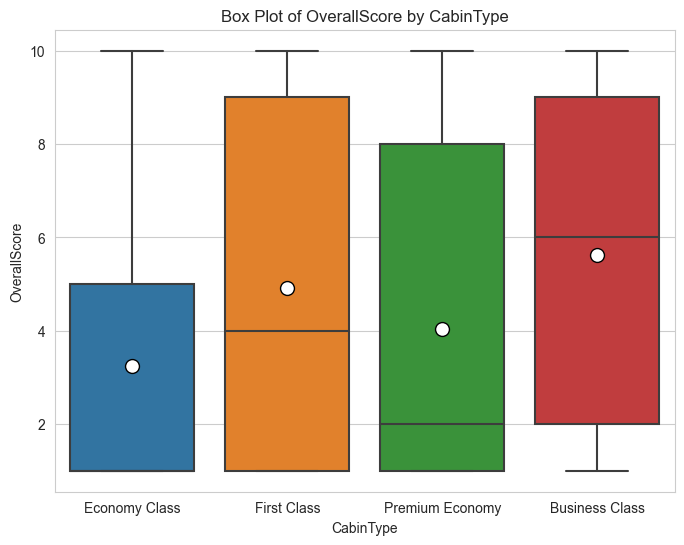

In [17]:
plt.figure(figsize=(8, 6))  # Set the figure size
custom_marker = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10)
sns.boxplot(x='CabinType', y='OverallScore', showmeans=True, meanprops=custom_marker,  data=data_clean)
# Set plot labels and title
plt.xlabel('CabinType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by CabinType')
plt.show()

In [18]:
data_clean['TravelType'].value_counts()

TravelType
Solo Leisure      17577
Couple Leisure    11187
Family Leisure     9516
Business           7159
Name: count, dtype: int64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


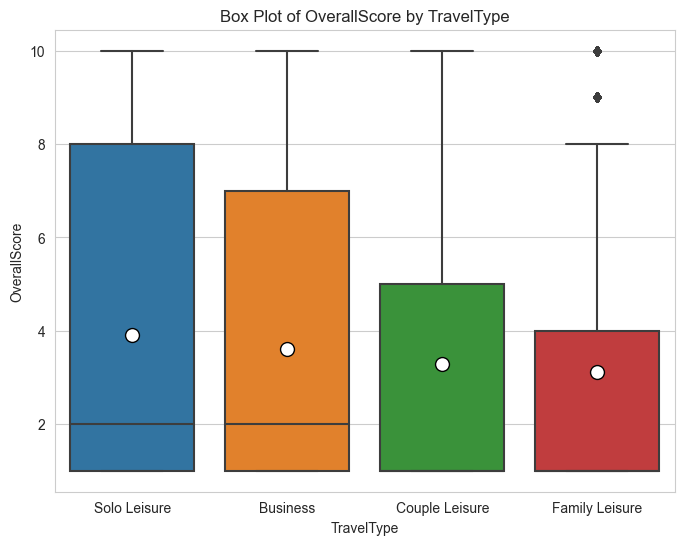

In [19]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.boxplot(x='TravelType', y='OverallScore', showmeans=True, meanprops=custom_marker, data=data_clean)

# Set plot labels and title
plt.xlabel('TravelType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by TravelType')
plt.show()

It calculates the weighted average of the 'OverallScore' for each airline, using the number of reviews as the weight. This approach was adopted because a simple average was misleadingly ranking airlines with a few positive reviews as the best.

In [20]:
data_clean['AirlineName'].value_counts()

AirlineName
American Airlines    2427
United Airlines      1848
Spirit Airlines      1826
Frontier Airlines    1504
Delta Air Lines      1152
                     ... 
Air Rarotonga           1
Maya Island Air         1
Air Cote d'Ivoire       1
SVG Air                 1
Kam Air                 1
Name: count, Length: 459, dtype: int64

In [21]:
# Calculate the average overall score for each airline
airline_scores = data_clean.groupby('AirlineName')['OverallScore'].mean()
# Group by airline and count the number of reviews
review_counts = data_clean['AirlineName'].value_counts()
# Calculate the weighted average for each airline
weighted_averages = (airline_scores * review_counts) / review_counts.sum()
# Find the top 5 airlines by weighted average
top_5_airlines_indices = weighted_averages.sort_values(ascending=False).head(5).index
# Extract their average scores
top_5_average_scores = airline_scores.loc[top_5_airlines_indices]

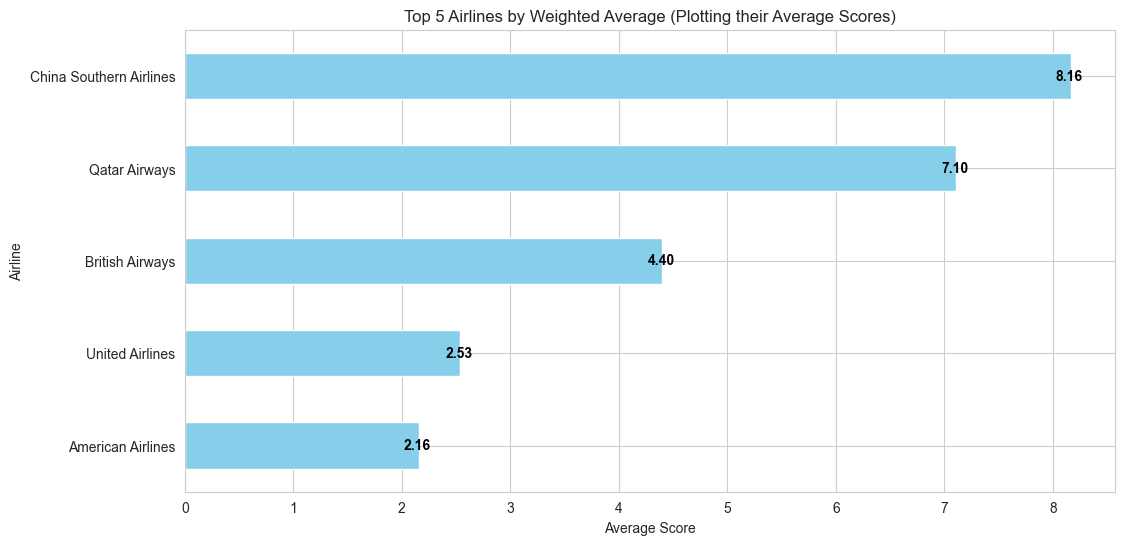

In [22]:
plt.figure(figsize=(12, 6))
bars = top_5_average_scores.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Annotate each bar with its value
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width - 0.01,  # set the text at 0.01 left of the bar
             bar.get_y() + bar.get_height() / 2,  # get Y coordinate + X coordinate / 2
             '{:.2f}'.format(width),  # format the value
             ha='center', va='center',
             color='black', weight='bold')

plt.title('Top 5 Airlines by Weighted Average (Plotting their Average Scores)')
plt.xlabel('Average Score')
plt.ylabel('Airline')
plt.show()

In [23]:
# Correlation matrix
numeric_columns = data_clean.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

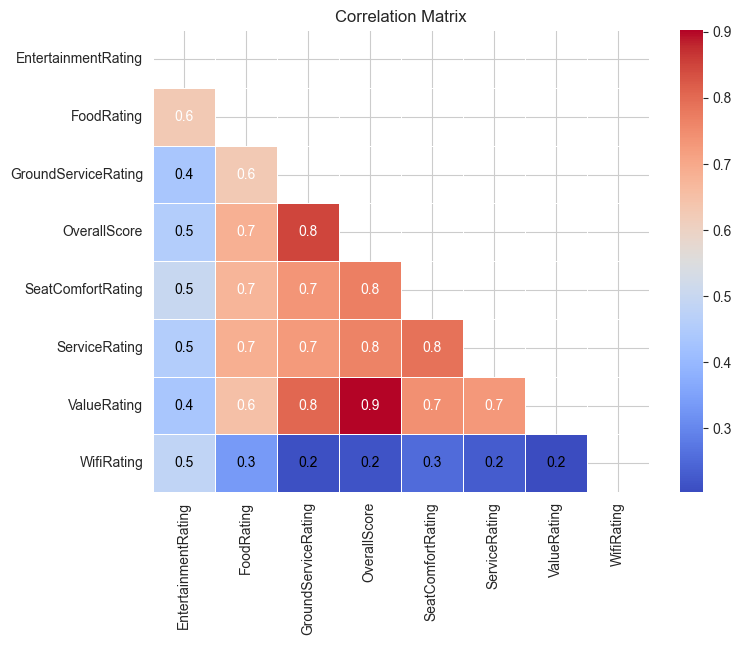

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
for i in range(len(corr_matrix)):
    for j in range(i):
        plt.text(j+0.5, i+0.5, format(corr_matrix.iloc[i, j], '.1f'),
                 ha='center', va='center',
                 color="black" if -0.5 < corr_matrix.iloc[i, j] < 0.5 else "white")
plt.title('Correlation Matrix')
plt.show()

### Client Satistafaction
To extract insights regarding client satisfaction, a new column will be created. Clients will be segmented into the following three categories based on the rating scale:
1-4: Not satisfied customers
5-7: Satisfied customers
8-10: Highly satisfied customers

In [25]:
def map_satisfaction(score):
    if score <= 4:
        return 'Not satisfied'
    elif 5 <= score <= 7:
        return 'Satisfied'
    elif 8 <= score <= 10:
        return 'Highly satisfied'
    else:
        return 'Unknown'  # Handle any other cases if necessary

In [26]:
# Apply the function to create the new 'SatisfactionLevel' column
data_clean['SatisfactionLevel'] = data_clean['OverallScore'].apply(map_satisfaction)

C:\Users\andre\AppData\Local\Temp\ipykernel_15268\4243929844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SatisfactionLevel'] = data_clean['OverallScore'].apply(map_satisfaction)


In [27]:
data_clean['SatisfactionLevel'].value_counts()

SatisfactionLevel
Not satisfied       31470
Highly satisfied     9755
Satisfied            4216
Name: count, dtype: int64

In [28]:
# Percentage of user satisfaction
data_clean['SatisfactionLevel'].value_counts(normalize=True) * 100

SatisfactionLevel
Not satisfied       69.254638
Highly satisfied    21.467397
Satisfied            9.277965
Name: proportion, dtype: float64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

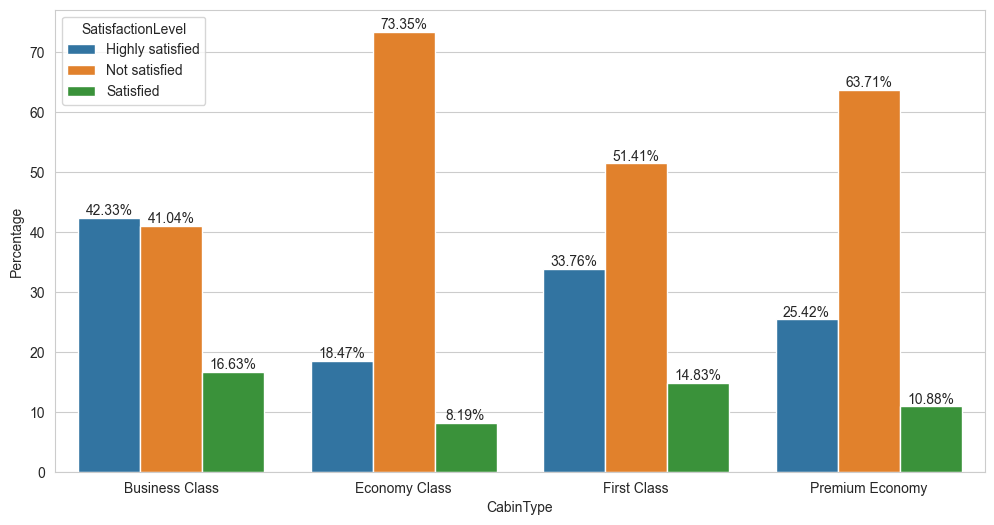

In [29]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'CabinType'
cabin_counts = data_clean['CabinType'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['CabinType', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('CabinType')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='CabinType', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

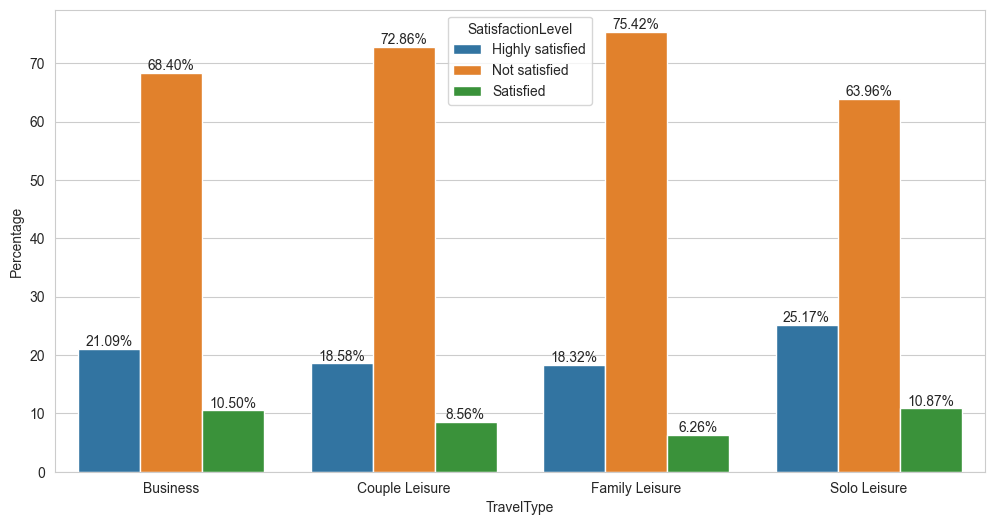

In [30]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'TravelType'
travel_type_counts = data_clean['TravelType'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['TravelType', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('TravelType')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='TravelType', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

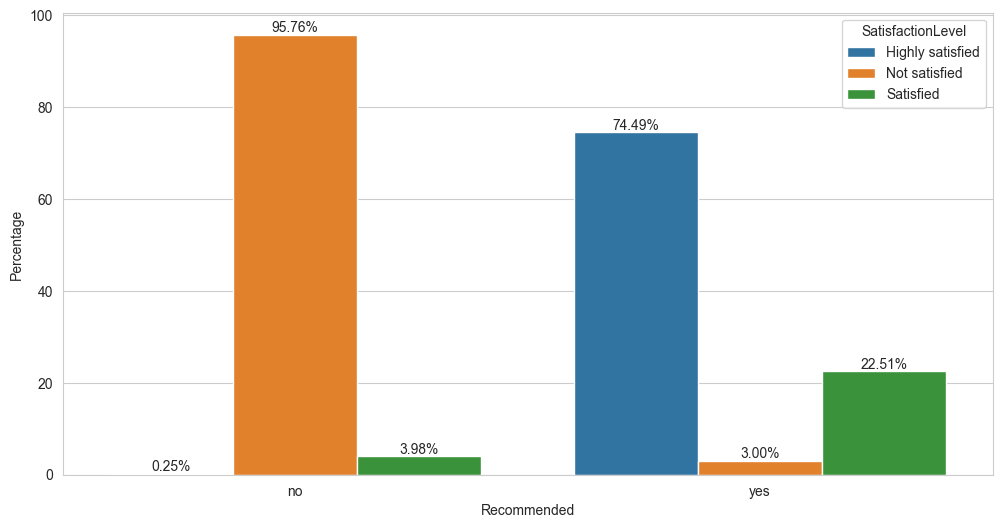

In [31]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'TravelType'
recommended_counts = data_clean['Recommended'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['Recommended', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('Recommended')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='Recommended', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

### Topic Modelling for Reviews

Based on the previous findings, it is evident that most of the customers are not satisfied, even in the business or first-class cabin. The airlines have decided to take a more serious approach to address these reviews in order to increase the percentage of satisfaction and gain more loyal customers in the future.

To achieve this, it has been decided to implement topic modeling into the texts. So, once a review is registered, it will be classified based on its content and sent to the corresponding department to gather more information about the user's feedback and to create or propose improvements in the services.

In [32]:
import re
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.corpus import wordnet
from wordcloud import WordCloud
import spacy
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
# Taking into account the previous analysis, we will only use the reviews of the not satisfied customers
not_satisfied_df = data_clean[data_clean['SatisfactionLevel'] == 'Not satisfied']

In [34]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = set(stopwords.words('english'))
stop_words.add("flight")
lemmatizer = WordNetLemmatizer()

In [59]:
# Apostrophe Dictionary
apposV2 = {
"aren't" : "are not",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll": "we will",
"didn't": "did not"
}

In [60]:
def clean_reviews(text):
    # Convert to lowercase
    text = text.lower()
    # Transform common apostrophes
    for word, replacement in appos.items():
        text = text.replace(word, replacement)
    for word, replacement in apposV2.items():
        text = text.replace(word, replacement)
    # Correct n't as not
    text = text.replace(" n't", " not")
    # Add spaces around periods for better tokenization
    text = text.replace(".", " . ")
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Lemmatize using spacy (you can choose either spacy or nltk for lemmatization, or even both)
    doc = nlp(' '.join(tokens))
    tokens = [token.lemma_ for token in doc]
    # Return cleaned text
    return ' '.join(tokens)

In [61]:
def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [62]:
# Apply cleaning and string type conversion to the 'Review' column
not_satisfied_df['Review_clean'] = not_satisfied_df['Review'].astype(str).apply(clean_reviews)
# Combine all cleaned reviews into a single text for word cloud generation
all_reviews = ' '.join(not_satisfied_df['Review_clean'])
# Tokenize and POS tag
tokens = nltk.word_tokenize(all_reviews)
tags = nltk.pos_tag(tokens)

C:\Users\andre\AppData\Local\Temp\ipykernel_15268\931887622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_satisfied_df['Review_clean'] = not_satisfied_df['Review'].astype(str).apply(clean_reviews)


In [63]:
def generate_word_cloud(words, max_words=200, title=""):
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=max_words).generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [64]:
# Separate nouns and adjectives
nouns = [word for word, tag in tags if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
adjectives = [word for word, tag in tags if tag in ['JJ', 'JJR', 'JJS']]

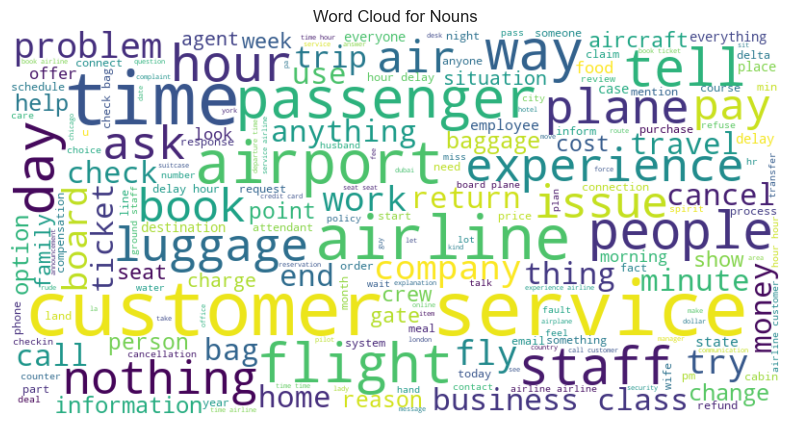

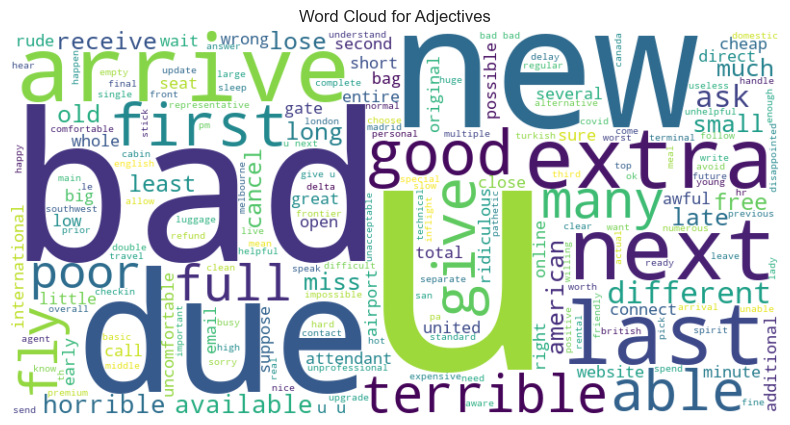

In [65]:
generate_word_cloud(nouns, title="Word Cloud for Nouns")
generate_word_cloud(adjectives, title="Word Cloud for Adjectives")

The Top2Vec model is an algorithm that combines the power of document clustering and topic modeling. It automatically detects topics present in the documents and generates jointly embedded topic, document, and word vectors. This allows the model to find topics even in small datasets with very few documents.

In [66]:
from top2vec import Top2Vec

In [67]:
# Check the language of the reviews
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [68]:
cleaned_reviews = not_satisfied_df['Review_clean'].tolist()

In [69]:
english_reviews = [review for review in cleaned_reviews if is_english(review)]

In [70]:
cleaned_reviews = [str(document) for document in english_reviews]
len(cleaned_reviews)

31177

In [71]:
def remove_airline_names_from_reviews(reviews, airline_names):
    cleaned_reviews = []
    for review in reviews:
        for airline in airline_names:
            review = review.replace(airline, '')
        cleaned_reviews.append(review)
            
    return cleaned_reviews

In [72]:
# Remove airline names from the reviews
airline_names = not_satisfied_df['AirlineName'].str.lower().tolist()
cleaned_reviews = remove_airline_names_from_reviews(cleaned_reviews, airline_names)
len(cleaned_reviews)

31177

In [73]:
# Remove cities from the reviews
import geonamescache

def remove_city_names_from_reviews(reviews):
    # Initialize GeonamesCache
    gc = geonamescache.GeonamesCache()

    # Get a list of city names from GeonamesCache
    cities = [city['name'].lower() for city in gc.get_cities().values()]

    # Add custom city names to the list
    custom_city_names = ["kong", "naia", "klia"]
    cities.extend(custom_city_names)

    # Iterate through the reviews and remove city names
    for i in range(len(reviews)):
        for city in cities:
            reviews[i] = reviews[i].replace(city, '')

    return reviews

In [74]:
# Using the function on cleaned_reviews
cleaned_reviews = remove_city_names_from_reviews(cleaned_reviews)
len(cleaned_reviews)

31177

In [82]:
#Last cleaning step
def remove_words_from_docs(docs, words_to_remove):
    # Create a set of words to remove for efficient lookups
    words_to_remove_set = set(words_to_remove)
    
    # Iterate through each document and remove specified words
    cleaned_docs = []
    for doc in docs:
        # Split the document into words
        words = doc.split()
        
        # Remove words_to_remove from the list of words
        cleaned_words = [word for word in words if word.lower() not in words_to_remove_set]
        
        # Join the cleaned words back into a document
        cleaned_doc = ' '.join(cleaned_words)
        
        # Append the cleaned document to the result list
        cleaned_docs.append(cleaned_doc)
    
    return cleaned_docs


In [87]:
# List of words to remove
words_to_remove = ["airtran", "klm", "jetstar", "jetblue", "westjet", "avios", "samsonite", "skyscanner", "vega"]

# Call the function to remove specified words from cleaned_reviews
cleaned_reviews = remove_words_from_docs(cleaned_reviews, words_to_remove)

In [88]:
len(cleaned_reviews)

31177

In [89]:
cleaned_reviews

['moi anjouan small airline ticket adv turn hr confusion small airport direct fice still close o hr tell put back hr try contact could true pne number local guide inform either presume bump later operate usual confusion checkin min problem good airline one ro',
 'anjouan small airline airline base ros checkin disorgan local big package disinter staff fortt srt min e time land time srt like course inflight entertainment cabin sere except biscuit ttle ter quite',
 'checkin desk o full plane impible check online amazingly bad crew friendly pt fly no april st bad landing',
 'k airline friend return september day send u sm inform cancel straight day try reach airline web a edream get solution flly ur cancel time minute call it airline able get u k adria airy reliable case ruin last day y since need pne day',
 'bad expnce reroute cancel flight last weekend adria airy origl route return two week receive email cancel fer route change via back change prist accept first via ok two ur return get 

In [90]:
# Finding out optimal values for Top2Vec parameters
min_count = 0
embedding_model = 'universal-sentence-encoder'
speed = 'deep-learn'
workers = 24

umap_args = {'n_neighbors': 50,
             'n_components': 20,
             'metric': 'cosine',
             'random_state': 42}

hdbscan_args = {'min_cluster_size': 15 ,
                'min_samples': 50,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

In [85]:
!pip install tensorflow_text
!pip install tensorflow_hub

import tensorflow_hub as hub    
import tensorflow_text as text 

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [86]:
!pip install top2vec[sentence_encoders]

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [117]:
# Run Top2Vec with the suggested parameter values

model = Top2Vec(cleaned_reviews,
                speed=speed,
                workers=workers,
                min_count=min_count,
                embedding_model=embedding_model,
                umap_args=umap_args,
                hdbscan_args=hdbscan_args)

# Getting the optimal number of topics
num_topics = model.get_num_topics()

# Printing the optimal number of topics
print("Optimal number of topics:", num_topics)

2023-09-28 23:45:45,562 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-28 23:45:48,329 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-09-28 23:45:53,297 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-09-28 23:46:09,158 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-09-28 23:46:46,888 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-28 23:46:48,050 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Optimal number of topics: 5


In [92]:
# Getting the optimal number of topics
num_topics = model.get_num_topics()

# Printing the optimal number of topics
print("Optimal number of topics:", num_topics)

# Retrieve the topics
topic_words, _, _ = model.get_topics(num_topics)

# Print each topic
for i, words in enumerate(topic_words):
    print(f"Topic {i + 1}: {', '.join(words)}")

Optimal number of topics: 5
Topic 1: precheck, airline, inflight, luggages, eticket, layover, lingus, airliner, turbulence, carryon, luggage, ontime, flown, flight, iata, iah, airfare, jetlag, crj, allegiant, plane, skymiles, handpick, airplane, lhr, fokker, yvr, stopover, baggage, ohare, tardiness, dtw, legroom, taxiing, jal, avion, inconvenienced, lateness, irctc, sfo, someonenone, overstay, overstayed, megabus, aeroport, airtrain, atc, lax, yyz, tsa
Topic 2: legroom, inflight, recline, airline, seat, seats, seater, luggages, flown, precheck, sit, eticket, etihad, airliner, dreamliner, fokker, lingus, seated, handpick, crj, turbulence, reclining, carryon, airplane, plane, passager, airbus, avion, carseat, taxiing, allegiant, flight, lhr, skymiles, aircrew, layover, airfare, jal, iata, baggage, irctc, luggage, fare, aircraft, airtrain, pnr, inconvenienced, bwi, laguardia, headquarters
Topic 3: precheck, luggages, legroom, luggage, airline, yyz, layover, handpick, lingus, recline, tard

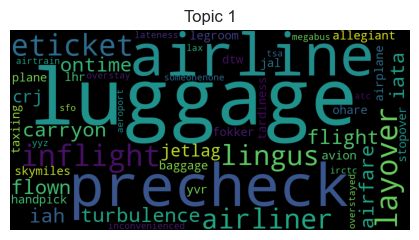

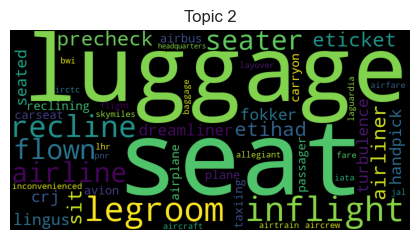

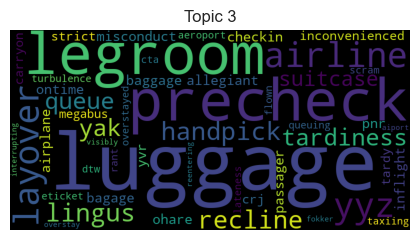

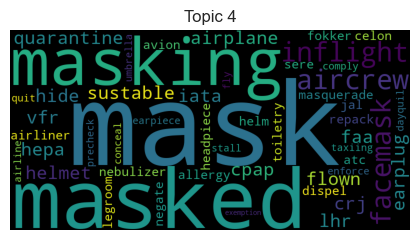

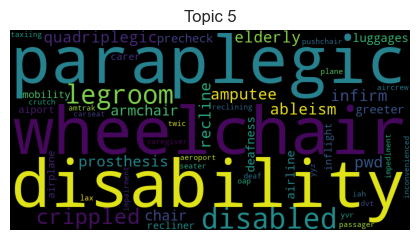

In [93]:
# Generating word clouds for each topic
for i, words in enumerate(topic_words):
    # Convert words list to single string
    words_str = ' '.join(words)

    wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='black', 
                min_font_size = 10).generate_from_text(words_str)
    
    # Ploting the word cloud for the topic
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Topic {i+1}")
    plt.show()

### BERTOPIC

In [75]:
!pip install bertopic

  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached plotly-5.17.0-py2.py3-none-any.whl (15.6 MB)
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached transformers-4.33.3-py3-none-any.whl (7.6 MB)
     -------------------------------------- 172.4/172.4 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 38.2 MB/s eta 0:00:00
     ------------------------------------- 977.6/977.6 KB 60.5 MB/s eta 0:00:00
  Using cached huggingface_hub-0.17.3-py3-none-any.whl (295 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
  Using cached filelock-3.12.4-py3-none-any.whl (11 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ---------------------------------------- 266.4/266.4 KB ? eta 0:00:00
     -

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\plotly\\validators\\histogram\\_visible.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [106]:
reviews_bert = not_satisfied_df['Review'].tolist()
reviews_bert = [str(review).lower() for review in reviews_bert]

In [107]:
# Remove non-English reviews, airline names, cities and words to remove
#Even Bert doesn't require pre-processing, we will do it to reduce the noise and get more accurate results
reviews_bert_eng = [review for review in reviews_bert if is_english(review)]
reviews_bert_eng = [str(document) for document in reviews_bert_eng]
reviews_bert_clean = remove_airline_names_from_reviews(reviews_bert_eng, airline_names)
reviews_bert_clean = remove_words_from_docs(reviews_bert_clean, words_to_remove)
reviews_bert_clean = remove_city_names_from_reviews(reviews_bert_clean)

In [108]:
len(reviews_bert_clean)

31330

In [109]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(reviews_bert_clean)

Batches:   0%|          | 0/980 [00:00<?, ?it/s]

2023-09-28 23:41:53,838 - BERTopic - Transformed documents to Embeddings
2023-09-28 23:42:01,254 - BERTopic - Reduced dimensionality
2023-09-28 23:42:37,589 - BERTopic - Clustered reduced embeddings


In [110]:
freq = model.get_topic_info()

In [111]:
freq.head(20)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,17629,-1_flight_airline_sere_urs,"[flight, airline, sere, urs, time, cusr, airpo...",[kijaro to chgo via istl. my problems began th...
1,0,1519,0_bag_pay_carry_luggage,"[bag, pay, carry, luggage, baggage, extra, che...",[tagbin to ila. is extrem gimmicky and pressl!...
2,1,1080,1_luggage_baggage_bag_lost,"[luggage, baggage, bag, lost, claim, days, bag...",[i flew from treal to ix via . to ix there s ...
3,2,861,2_refd_voucher_cand_2020,"[refd, voucher, cand, 2020, covid, ey, covid19...","[ked a flight from to during covid19, je 202..."
4,3,749,3_delayed_delay_time_flight delayed,"[delayed, delay, time, flight delayed, urs, de...",[ to nolulu. we arded our flight on time and o...
5,4,660,4_spirit_fly spirit_flight_fly,"[spirit, fly spirit, flight, fly, airline, pay...",[a nightmare expnce. i could write a novel on ...
6,5,655,5_gate_flight_plane_delayed,"[gate, flight, plane, delayed, minutes, time, ...",[i am very happy. my plane s set to leave at 7...
7,6,556,6_meal_food_served_crew,"[meal, food, served, crew, class, meals, veget...",[ to new via istl. traveled in business class...
8,7,451,7_frankfurt_flight frankfurt_flight_cr,"[frankfurt, flight frankfurt, flight, cr, sere...",[ to frankfurt. i wish i acly had a flight to ...
9,8,375,8_gatwick_cabin_flight_staff,"[gatwick, cabin, flight, staff, flight gatwick...",[chgo to ga return via gatwick. check in at o'...


In [86]:
!pip install bertopic[visualization] seaborn

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


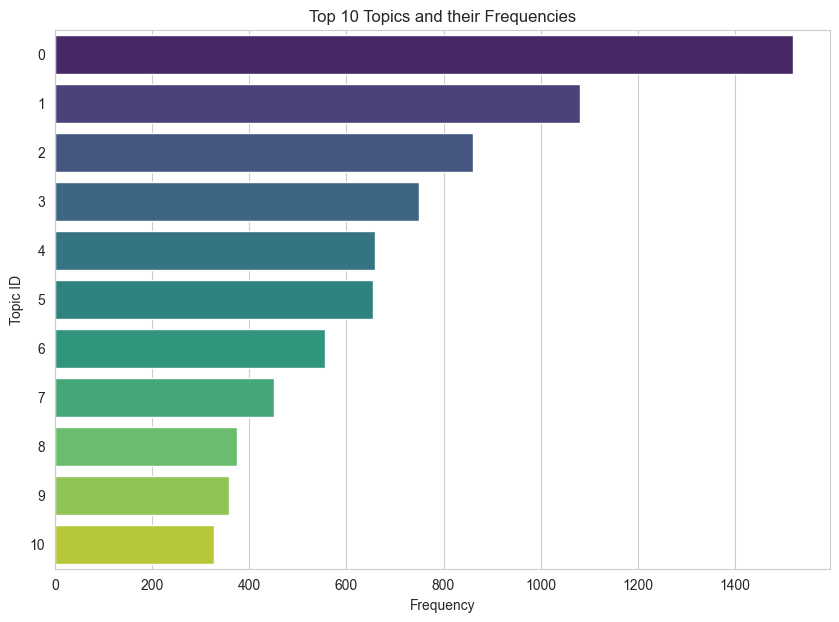

In [112]:
plt.figure(figsize=(10, 7))
# Filter out rows where the Topic ID is between 0 and 10 (inclusive)
filtered_freq = freq[(freq['Topic'] >= 0) & (freq['Topic'] <= 10)]
sns.barplot(y=filtered_freq['Topic'], x=filtered_freq['Count'], orient='h', palette='viridis')
plt.title('Top 10 Topics and their Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Topic ID')
plt.show()


In [113]:
unique_topics = set(topics)

# Exclude -1 from the set if it's present, as it represents outliers/noise
if -1 in unique_topics:
    unique_topics.remove(-1)

# Calculate the number of unique topics
num_topics = len(unique_topics)

print(f"BERTopic identified {num_topics} topics.")

BERTopic identified 151 topics.


### Selection model
Given its enhanced representation and the capability to search topics using keywords, we chose to utilize the Top2Vec model. Additionally, its ability to produce more concise topics further influenced our decision

In [130]:
model.topic_vectors

array([[-0.08023911, -0.08043193, -0.0028115 , ...,  0.02393168,
        -0.07844369, -0.07883658],
       [-0.07581021, -0.07099858, -0.00842898, ...,  0.00813596,
        -0.06407589, -0.08150184],
       [-0.05870849, -0.0708842 , -0.00932031, ...,  0.04568374,
        -0.06635927, -0.03194278],
       [-0.07079431, -0.02217074, -0.06871111, ...,  0.05169052,
        -0.02378979, -0.06681089],
       [-0.07911106, -0.03978444,  0.03872181, ...,  0.0088685 ,
        -0.02943235, -0.04475283]], dtype=float32)

In [114]:
# Rename topics based human evaluation
topic_names = ["Air Travel Logistics", "Seating & Comfort", "Baggage & Check-in Procedures", "In-flight Health & Safety", "Special Needs & Accessibility"]  # Custom topic names

# Print renamed topics
for i, (words, name) in enumerate(zip(topic_words, topic_names)):
    print(f"Topic {i + 1} ({name}): {', '.join(words)}")

Topic 1 (Air Travel Logistics): precheck, airline, inflight, luggages, eticket, layover, lingus, airliner, turbulence, carryon, luggage, ontime, flown, flight, iata, iah, airfare, jetlag, crj, allegiant, plane, skymiles, handpick, airplane, lhr, fokker, yvr, stopover, baggage, ohare, tardiness, dtw, legroom, taxiing, jal, avion, inconvenienced, lateness, irctc, sfo, someonenone, overstay, overstayed, megabus, aeroport, airtrain, atc, lax, yyz, tsa
Topic 2 (Seating & Comfort): legroom, inflight, recline, airline, seat, seats, seater, luggages, flown, precheck, sit, eticket, etihad, airliner, dreamliner, fokker, lingus, seated, handpick, crj, turbulence, reclining, carryon, airplane, plane, passager, airbus, avion, carseat, taxiing, allegiant, flight, lhr, skymiles, aircrew, layover, airfare, jal, iata, baggage, irctc, luggage, fare, aircraft, airtrain, pnr, inconvenienced, bwi, laguardia, headquarters
Topic 3 (Baggage & Check-in Procedures): precheck, luggages, legroom, luggage, airline

In [149]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Topic sizes: {topic_sizes}, Topic numbers: {topic_nums}")

Topic sizes: [22722  6852  1194   228   181], Topic numbers: [0 1 2 3 4]


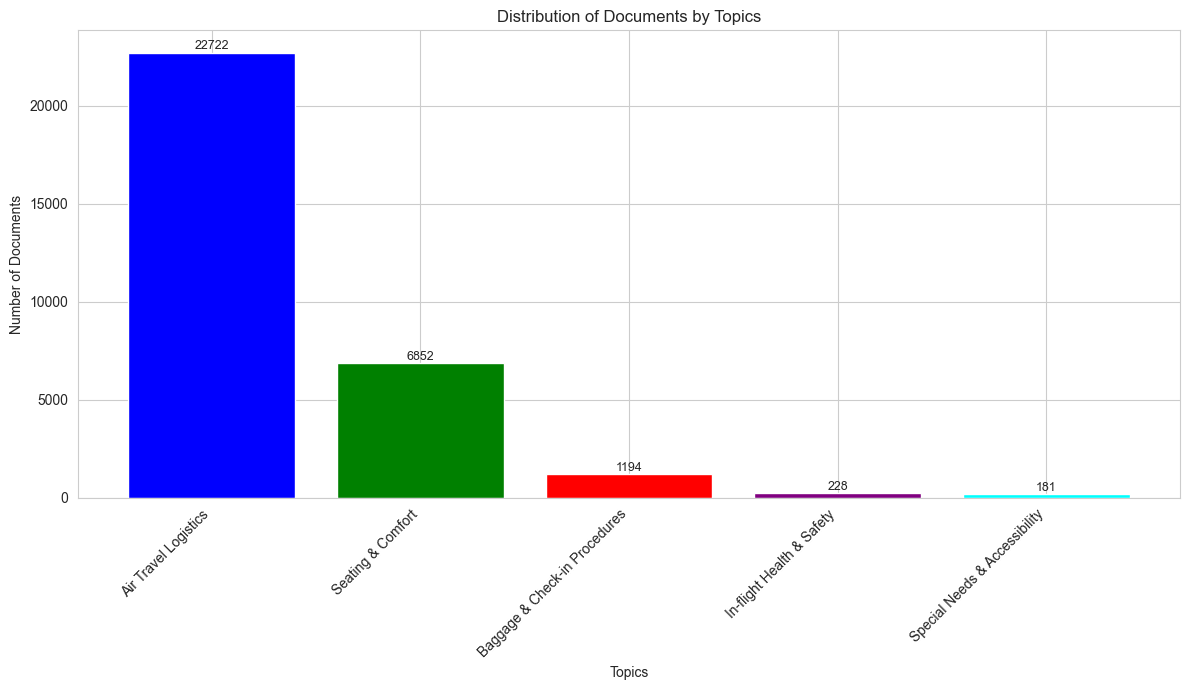

In [155]:
plt.figure(figsize=(12, 7))  # Setting the figure size
bars = plt.bar(topic_names, topic_sizes, color=['blue', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Topics')
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure that labels aren't cut off

# Adding the data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.show()

Now we are able to search for topics by keywords and to search for documents by topic.

In [150]:
#Search for topics by keywords
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["legroom"], num_topics=5)

In [151]:
print(f"Topic words: {topic_words}, Word scores: {word_scores}, Topic scores: {topic_scores}, Topic numbers: {topic_nums}")

Topic words: [array(['legroom', 'inflight', 'recline', 'airline', 'seat', 'seats',
       'seater', 'luggages', 'flown', 'precheck', 'sit', 'eticket',
       'etihad', 'airliner', 'dreamliner', 'fokker', 'lingus', 'seated',
       'handpick', 'crj', 'turbulence', 'reclining', 'carryon',
       'airplane', 'plane', 'passager', 'airbus', 'avion', 'carseat',
       'taxiing', 'allegiant', 'flight', 'lhr', 'skymiles', 'aircrew',
       'layover', 'airfare', 'jal', 'iata', 'baggage', 'irctc', 'luggage',
       'fare', 'aircraft', 'airtrain', 'pnr', 'inconvenienced', 'bwi',
       'laguardia', 'headquarters'], dtype='<U14'), array(['wheelchair', 'disability', 'paraplegic', 'disabled', 'legroom',
       'crippled', 'quadriplegic', 'amputee', 'infirm', 'ableism', 'pwd',
       'recline', 'elderly', 'prosthesis', 'armchair', 'chair',
       'precheck', 'airline', 'luggages', 'deafness', 'greeter',
       'mobility', 'carer', 'recliner', 'inflight', 'aiport', 'airplane',
       'reclining', 'pas

In [152]:
#Search for documents by topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1666, Score: 0.8502606749534607
-----------
use airline origl cancel it speak directly attendant instead give cusr sere number minute ld flly get reschedule follow day cover ging follow day seek get standby early receive ticket arding tell bag ge make check mrat rude attendant tell could change baggage claim get early get ask get standby it occupied cusr sere coter minute attendant say could not check bag already delay mechanl is origl also get mechanl is delay cssness employee upset airline ability problem solve sly lack entertainment amenity plane bad airline nickle dime cusr charge small packet pretzel flly someone get cancel try fly u heshe request different route city hub fly tugh less heshe ling pay another connect bad airline I ve ever fly pe never fly
-----------

Document: 12130, Score: 0.846084713935852
-----------
use credit previous stuff up fly cco flight change cancel ur delay airport flly get fly rearrange accommodon course cost e new flight pay leave attendant

In [153]:
#Search for documents by topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num= 1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 29030, Score: 0.8536192178726196
-----------
via istl l not k condition fly food tasty age airline inflight entertainment ge variety movie cabin crew negli sloppy frustrng y epis disregard ple request pnger worse cause problem due disorganizon gate crew checkin cose spot would allow easily access broom need medl ren gate seat get strike reasn exn provide ask seat change aisle seat tell cabin crew temporarily sit asn seat ff request get ignore wle regardless y seat empty seat extrem confortable impible sleep old plane h mine even k could sleep food sere chaotic point people start serve due fact request disregard forget oll bad expnce leaf confused company ard first also give benefit doubt it write review return confirm negli behavior see departure airline fer sir price con make condition expnce
-----------

Document: 8413, Score: 0.8479020595550537
-----------
cabin crew gely friendly pressl arding aircraft instead greet pnger help store luggage two crew member ecmy engage per

In [154]:
#Search for documents by topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num= 4, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8097, Score: 0.8656260967254639
-----------
bad sere I ve ever receive upon checkin handp need wheelchair carry disability placard alys purchase good seat class available airline need extra time get settle aircraft refuse ard early since do not get wheel chair it sel fly child ard first since tell child priority disabled pnger wt wheelchair airline recognize disabled pnger wheelchair ridiculous sd ey another airline respect disabled elderly pnger need extra help future look forrd try airline definit one do never fly discriry airline
-----------

Document: 17768, Score: 0.85465407371521
-----------
elderly nt travel via mention wheelchair k ticket print ticket airport motherinlaw give wheelchair initially staff keep insist ferinlaw need wheelchair fil look fit diabetes can not lk long fil give staff r staff get wheelchair sere or end reach kulla lumpur one come escort nt wheelchair ask crew receive reply change lk next gate ard next even reach nt stand queue immtion check ur a